In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [8]:
# Load your CSV file
data = pd.read_csv("train.csv")

# Quick look at your data
print(data.shape)
data.head()

NameError: name 'pd' is not defined

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [10]:
data = pd.read_csv("train.csv")
print(data.shape)
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
# Replace this with your target column name
target_col = 'target_column'  

X = data.drop(columns=[target_col])
y = data[target_col]

# If there are categorical features, you can encode them:
X = pd.get_dummies(X, drop_first=True)


KeyError: "['target_column'] not found in axis"

In [12]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

# 2. Load the dataset
data = pd.read_csv("train.csv")
print(data.shape)
data.head()

# 3. Define target column (replace 'SalePrice' with your actual target if different)
target_col = 'SalePrice'

# 4. Prepare features (X) and target (y)
X = data.drop(columns=[target_col])
y = data[target_col]

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# 5. Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 6. Compare Ridge and Lasso over a range of regularization strengths
alphas = np.logspace(-3, 3, 50)
ridge_train, ridge_test = [], []
lasso_train, lasso_test = [], []

for a in alphas:
    ridge = Ridge(alpha=a)
    lasso = Lasso(alpha=a, max_iter=10000)

    ridge.fit(X_train, y_train)
    lasso.fit(X_train, y_train)

    ridge_train.append(mean_squared_error(y_train, ridge.predict(X_train)))
    ridge_test.append(mean_squared_error(y_test, ridge.predict(X_test)))

    lasso_train.append(mean_squared_error(y_train, lasso.predict(X_train)))
    lasso_test.append(mean_squared_error(y_test, lasso.predict(X_test)))

# 7. Plot test MSE vs alpha
plt.figure(figsize=(10,6))
plt.semilogx(alphas, ridge_test, label='Ridge Test MSE', color='blue')
plt.semilogx(alphas, lasso_test, label='Lasso Test MSE', color='red')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Regularization on Ridge and Lasso Regression')
plt.legend()
plt.grid(True)
plt.show()

# 8. Inspect coefficients for a chosen alpha
alpha = 1.0
ridge = Ridge(alpha=alpha).fit(X_train, y_train)
lasso = Lasso(alpha=alpha).fit(X_train, y_train)

print("Ridge Coefficients:\n", ridge.coef_)
print("\nLasso Coefficients:\n", lasso.coef_)
print("\nNumber of non-zero Lasso coefficients:", np.sum(lasso.coef_ != 0))

# 9. Optional: Compare with Linear Regression
lin = LinearRegression().fit(X_train, y_train)
print("\nLinear Regression MSE (test):", mean_squared_error(y_test, lin.predict(X_test)))
print("Ridge MSE (test):", mean_squared_error(y_test, ridge.predict(X_test)))
print("Lasso MSE (test):", mean_squared_error(y_test, lasso.predict(X_test)))

(1460, 81)


ValueError: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

IndexError: single positional indexer is out-of-bounds

In [14]:
y = y.fillna(y.median())

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

Dataset shape: (1460, 81)


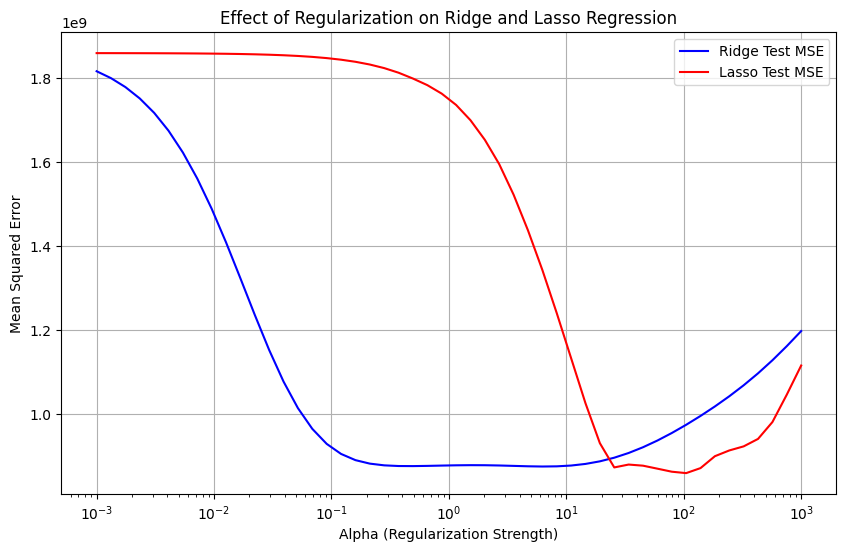

Ridge Coefficients:
 [ 1.53528027e-01 -1.13589519e+02 -1.24893597e+02  4.75756499e-01
  8.78405833e+03  4.41590143e+03  1.73938598e+02  1.05700473e+02
  6.59421148e+00 -1.73425798e+00  4.31095342e+00 -1.34368652e+00
  1.23300113e+00  1.78553539e+00  2.48010001e+01  2.99636985e+00
  2.95829217e+01  7.57270313e+03 -5.81902511e+02  7.69128732e+03
  3.20045511e+03 -2.50645065e+03 -1.03878677e+04  4.12177622e+03
  3.77817485e+03  1.00689448e+01  1.08831768e+04 -1.75309033e+00
  1.61966018e+01 -9.91554520e+00  5.87178627e+00  5.94046675e+01
  5.38992940e+01 -4.24773972e+01 -1.59824077e+00 -3.01848041e+01
 -2.55486587e+02  1.68212255e+04  1.85983052e+03  8.91552671e+03
  7.76127585e+03  1.58009759e+04  1.14595140e+04  5.79531370e+03
 -1.52512695e+04  2.63875188e+02  3.04554954e+04  1.00359069e+04
  1.90906680e+04 -1.82199780e+04  9.11643424e+03 -9.22649933e+03
 -1.51629094e+04 -1.08756803e+03  7.12118284e+03 -6.06200614e+03
 -6.63388658e+02  5.01129708e+03  5.14350449e+02 -4.82711222e+03
 -5.

In [16]:
# 1️⃣ Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

# 2️⃣ Load dataset
data = pd.read_csv("train.csv")
print("Dataset shape:", data.shape)
data.head()

# 3️⃣ Define target column (replace 'SalePrice' with your actual target)
target_col = 'SalePrice'

X = data.drop(columns=[target_col])
y = data[target_col]

# 4️⃣ Handle missing values
# Separate numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Fill missing values
X[num_cols] = X[num_cols].fillna(X[num_cols].median())
X[cat_cols] = X[cat_cols].fillna(X[cat_cols].mode().iloc[0])

# Fill missing values in target (if any)
y = y.fillna(y.median())

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# 5️⃣ Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 6️⃣ Compare Ridge and Lasso over a range of regularization strengths
alphas = np.logspace(-3, 3, 50)
ridge_train, ridge_test = [], []
lasso_train, lasso_test = [], []

for a in alphas:
    ridge = Ridge(alpha=a)
    lasso = Lasso(alpha=a, max_iter=10000)

    ridge.fit(X_train, y_train)
    lasso.fit(X_train, y_train)

    ridge_train.append(mean_squared_error(y_train, ridge.predict(X_train)))
    ridge_test.append(mean_squared_error(y_test, ridge.predict(X_test)))

    lasso_train.append(mean_squared_error(y_train, lasso.predict(X_train)))
    lasso_test.append(mean_squared_error(y_test, lasso.predict(X_test)))

# 7️⃣ Plot test MSE vs alpha
plt.figure(figsize=(10,6))
plt.semilogx(alphas, ridge_test, label='Ridge Test MSE', color='blue')
plt.semilogx(alphas, lasso_test, label='Lasso Test MSE', color='red')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Regularization on Ridge and Lasso Regression')
plt.legend()
plt.grid(True)
plt.show()

# 8️⃣ Inspect coefficients for alpha = 1
alpha = 1.0
ridge = Ridge(alpha=alpha).fit(X_train, y_train)
lasso = Lasso(alpha=alpha, max_iter=10000).fit(X_train, y_train)

print("Ridge Coefficients:\n", ridge.coef_)
print("\nLasso Coefficients:\n", lasso.coef_)
print("\nNumber of non-zero Lasso coefficients:", np.sum(lasso.coef_ != 0))

# 9️⃣ Compare with Linear Regression
lin = LinearRegression().fit(X_train, y_train)
print("\nLinear Regression MSE (test):", mean_squared_error(y_test, lin.predict(X_test)))
print("Ridge MSE (test):", mean_squared_error(y_test, ridge.predict(X_test)))
print("Lasso MSE (test):", mean_squared_error(y_test, lasso.predict(X_test)))